<a href="https://colab.research.google.com/github/BrandonKaza32/FINAL-CAPESTONE-PROJECT/blob/main/SpaceX_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Objectives**
Perform exploratory Data Analysis and Determine Training Labels
+ create a column for class
+ Standardize the data
+ Split into training data and test data

Find the best Hyperparametere for SVM, Classification Trees and Logistic Regression.
+ Find the method the performs best using test data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

###This functoin is to plot the confusion Matrix

In [2]:
def plot_confusion_matrix(y, y_predict):
  "this function plots the confusion matrix"
  from sklearn.metrics import confusion_matrix

  cm = confusion_matrix(y, y_predict)
  ax = plt.subplot()
  sns.heatmap(cm, annot=True, ax=ax,)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix');
  ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'land'])
  plt.show()

###Load the dataframe

In [3]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL1)
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(URL2)
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


###TASK 1

Create a Numpy array from the column `Class` in `data`, by applying the method `to_numpy()` then assign it to the variable `Y`, make sure the output is a Pandas series (only one bracket df['name of column'])



In [5]:
#Create a Numpy array from column class in data, by applying the method to_numpy()
Y = data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

###Task 2

Standardize the data in `X` then reassign it to the varibale `X` using the teransfrom provided below.

In [6]:
# Standardize the data in X then reassign it to the variable X using the transform provided
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)
X

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

###TASK 3

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [8]:
Y_test.shape

(18,)

###Task 4

Create a logistic regression object then create a GridSearchCV object `logreg_cv` with cv=10.Fit the object to find the best parameters from the dictionary `parameters`.

In [9]:
#Create a logistic regression object then create a GridSearchCV object `logreg_cv` with cv=10.Fit the object to find the best parameters from the dictionary `parameters`.
lr = LogisticRegression()
parameters = {'C': [0.01, 0.1, 1],
              'penalty': ['l2'],
              'solver':['lbfgs']}
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

#print("tuned hpyerparameters :(tuned by GridSearchCV) ",logreg_cv.best_params_)
#print("accuracy :",logreg_cv.best_score_)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

###Task 5
Calculatethe accuracy on the test data using the method score:

In [10]:
print("tuned hyperparameters: (best parameters)", logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)

tuned hyperparameters: (best parameters) {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8214285714285714


In [11]:
accuracy_lr = logreg_cv.score(X_test, Y_test)
print("Accuracy on Logistic Regression:", accuracy_lr)

Accuracy on Logistic Regression: 0.8888888888888888


lets look at the confusion matrix

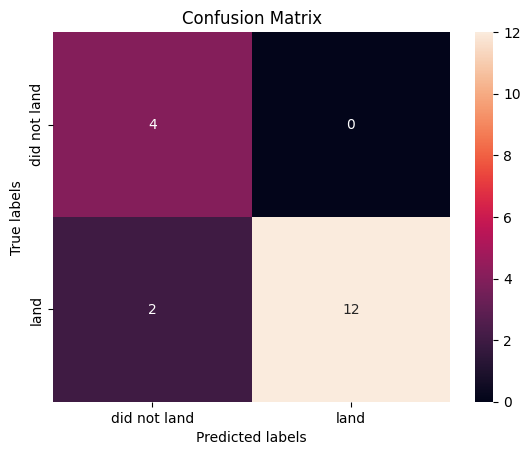

In [12]:
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

+ True Positive 12 (True label is landed, Predicted label is also landed)
+ False Positive 4(True label is not landed, Predicted label is landed )

###Task 6

Create a support vector machine object then create a `GridSearchCV` object `svm_cv` with cv=10.Fit the object to find the best parameters from the dictionary 'parameters'

In [13]:
#Create a support vector machine object then create a `GridSearchCV` object `svm_cv` with cv=10.Fit the object to find the best parameters from the dictionary 'parameters'
svm =SVC()
parameters = {'kernel':('linear', 'rbf', 'poly', 'rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma': np.logspace(-3, 3, 5)}
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [14]:
print("tuned hyperparameters :(best parameters)", svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hyperparameters :(best parameters) {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
accuracy : 0.85


###Task 7
calculate the accuracy on the test data using the method `score`

In [15]:
#calculate the accuracy on the test data using the method `score`
accuracy = svm_cv.score(X_test, Y_test)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.8888888888888888


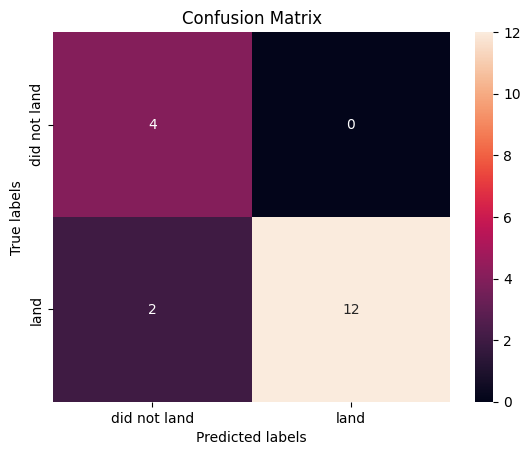

In [16]:
yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

###Task 8
Create a decision tree classifier object then create a `GridSearchCV` object `tree_cv` with cv = 10.Fit the object to find the best parameters from the dictionary 'parameters'.

In [17]:
tree = DecisionTreeClassifier()
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2*n for n in range(1,10)],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}

tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/u

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [18]:
print("tuned hyperparameters :(best parameters)", tree_cv.best_params_)
print("Accuracy :",tree_cv.best_score_)

tuned hyperparameters :(best parameters) {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
Accuracy : 0.8767857142857143


###Task 9
Calculate the accuracy of the tree_cv on the test data using the method `score`:

In [19]:
accuracy_tree = tree_cv.score(X_test, Y_test)
print("Accuracy on tree is:", accuracy_tree)

Accuracy on tree is: 0.9444444444444444


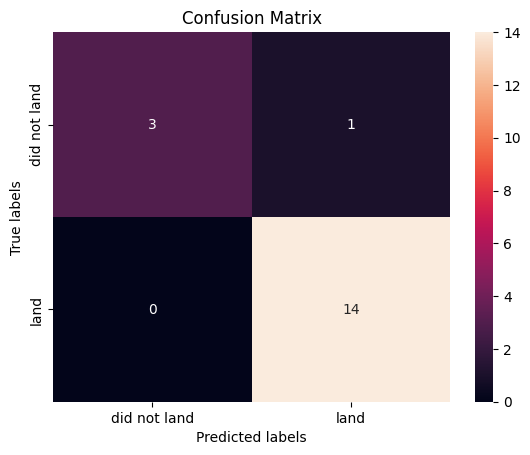

In [20]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

+ True positive 11(True label landed, Predicted label also landed)
+ False positive 2(True label did not land, Predicated label landed)

###Task 10
Create a k nearest neighbors object then create a `GridSearchCV` object `knn_cv` with cv=10. Fit the object to find the best parameters from the dictionary `parameters`

In [21]:
KNN = KNeighborsClassifier()
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p':[1,2]}

knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [22]:
print("tuned hyperparameters :(best parameters)", knn_cv.best_params_)
print("Accuracy :",knn_cv.best_score_)

tuned hyperparameters :(best parameters) {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy : 0.85


###Task 11
Calculate the accuracy of knn_cv on the test data using the method 'score'

In [23]:
accuracy_knn = knn_cv.score(X_test, Y_test)
print("Accuracy on KNN :", accuracy_knn)

Accuracy on KNN : 0.9444444444444444


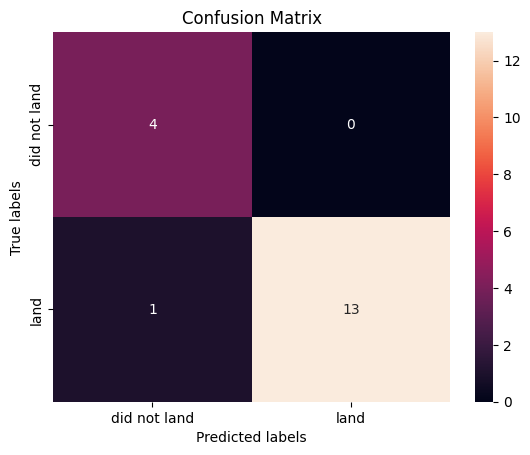

In [24]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)